# Initial Setup

### Iris Classification using sklearn iris dataset

Import Data Set

In [364]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Convert dataset to pd dataframe

In [365]:
iris = pd.DataFrame(
    data = np.c_[iris['data'], iris['target']],
    columns = iris['feature_names'] + ['target']
)

iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


Data includes Speal and Petal Length and Width, as well as numerical representation of classes of Iris flowers. (Setosa (0), Versicolor (1), Virginia (2))

In [366]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("Setosa")
    elif iris['target'][i] == 1:
        species.append("Versicolor")
    else:
        species.append("Virginica")
        
iris['species'] = species

Each Ckass has 50 instances. Total = 150

In [367]:
iris.groupby('species').size()

species
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

Use describe method to gain extra information

In [368]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Plotting the data set for visual representation

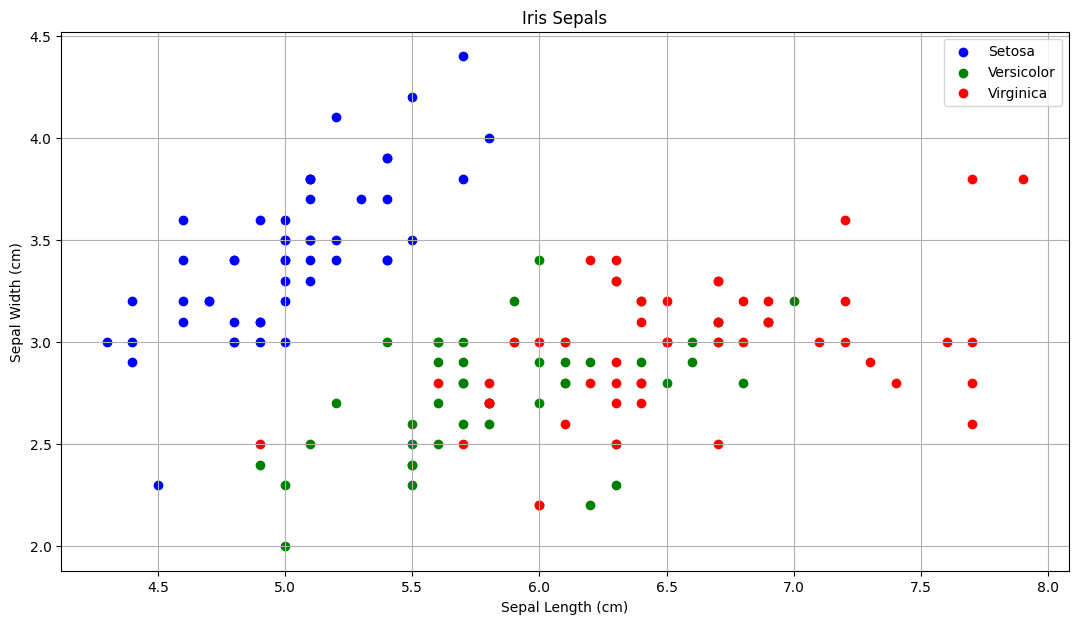

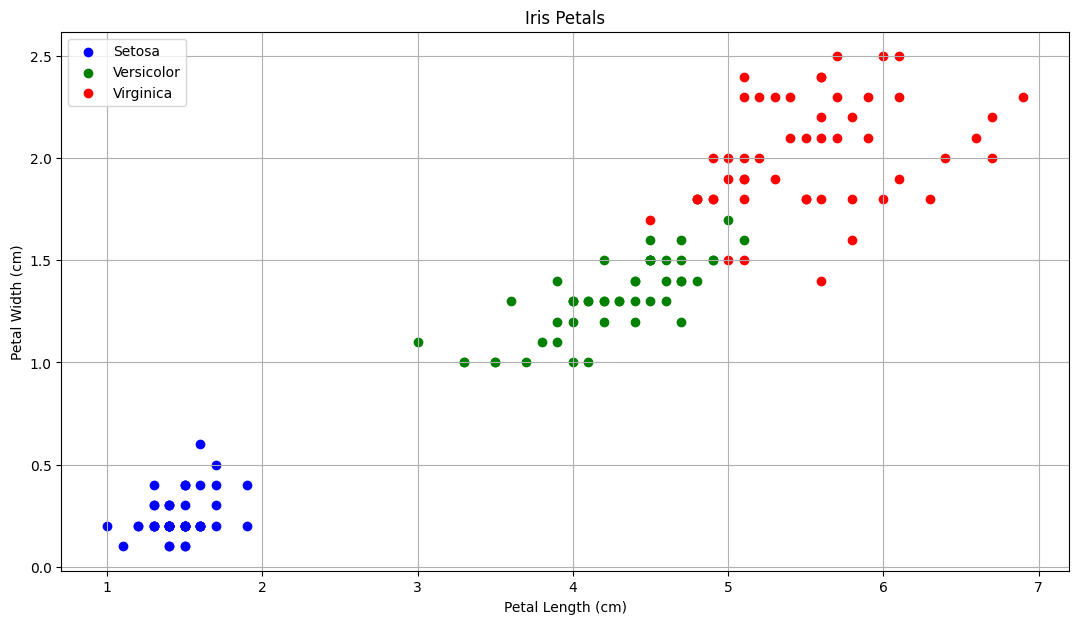

In [369]:
import matplotlib.pyplot as plt

setosa = iris[iris['species'] == 'Setosa']
versicolor = iris[iris['species'] == 'Versicolor']
virginica = iris[iris['species'] == 'Virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

ax.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], color = 'blue', label = 'Setosa')
ax.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], color = 'green', label = 'Versicolor')
ax.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], color = 'red', label = 'Virginica')

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.grid()
ax.set_title('Iris Sepals')
ax.legend()

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], color = 'blue', label = 'Setosa')
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], color = 'green', label = 'Versicolor')
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], color = 'red', label = 'Virginica')

ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.grid()
ax.set_title('Iris Petals')
ax.legend()

# Performing Classification

In [370]:
def custom_train_test_split(X, y, train_percentage, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)
        
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    train_size = int(train_percentage * len(X))
    
    X_train, X_test = X[indices[:train_size]], X[indices[train_size:]]
    y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]
    
    return X_train, X_test, y_train, y_test

In [371]:
from sklearn.model_selection import train_test_split

# We only need measurements
X = iris.drop(['target', 'species'], axis = 1)

# Need to convert into numpy array 
X = X.to_numpy()[:, (2,3)]
y = iris['target']

# Perform Experiment

In [372]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def run_experiment(train_percentage, num_trials=10, random_seed=42):
    accuracies = []

    for _ in range(num_trials):
        # Splitting into train and test using custom_train_test_split
        X_train, X_test, y_train, y_test = custom_train_test_split(X, y, train_percentage, random_seed)

        # Training a logistic regression model
        log_reg = LogisticRegression()
        log_reg.fit(X_train, y_train)
        test_prediction = log_reg.predict(X_test)

        # Calculating accuracy
        accuracy = metrics.accuracy_score(y_test, test_prediction)
        accuracies.append(accuracy)

    # Return the mean accuracy across trials
    return np.mean(accuracies)

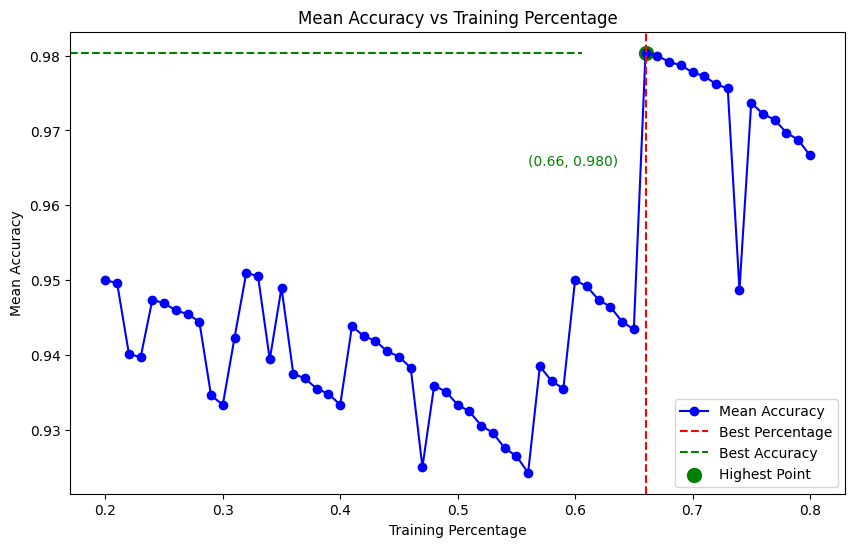


Best Training Split Percentage: 66.00% with Mean Accuracy: 0.980


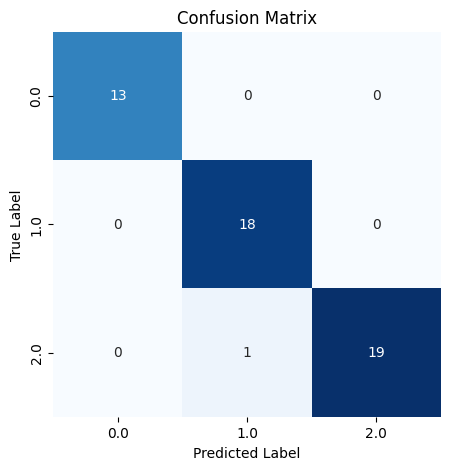

In [373]:
import seaborn as sns

train_percentages = np.arange(0.2, 0.8, 0.01)
mean_accuracies = []

for percentage in train_percentages:
    mean_accuracy = run_experiment(percentage)
    mean_accuracies.append(mean_accuracy)

# Plotting the graph of mean accuracies
plt.figure(figsize=(10, 6))
plt.plot(train_percentages, mean_accuracies, marker='o', linestyle='-', color='blue', label='Mean Accuracy')
best_index = np.argmax(mean_accuracies)
plt.axvline(x=train_percentages[best_index], linestyle='--', color='red', label='Best Percentage')
plt.axhline(y=mean_accuracies[best_index], linestyle='--', color='green', xmax=train_percentages[best_index], label='Best Accuracy')
# Annotation for the highest point
plt.scatter(train_percentages[best_index], mean_accuracies[best_index], color='green', marker='o', s=100, label='Highest Point')
plt.text(train_percentages[best_index] - 0.1, mean_accuracies[best_index] - 0.015, f'({train_percentages[best_index]:.2f}, {mean_accuracies[best_index]:.3f})', color='green')
plt.xlabel('Training Percentage')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs Training Percentage')
plt.legend()

# Displaying the graph
plt.show()

# Finding the best percentage
best_percentage = train_percentages[np.argmax(mean_accuracies)]
print(f"\nBest Training Split Percentage: {best_percentage * 100:.2f}% with Mean Accuracy: {np.max(mean_accuracies):.3f}")

# Splitting the data with the best testing percentage
X_train_best, X_test_best, y_train_best, y_test_best = custom_train_test_split(X, y, best_percentage, random_seed=42)

# Training a logistic regression model on the best split
log_reg_best = LogisticRegression()
log_reg_best.fit(X_train_best, y_train_best)
test_prediction_best = log_reg_best.predict(X_test_best)

# Display the confusion matrix for the best split
class_labels = np.unique(y)
confusion_matrix_best = metrics.confusion_matrix(y_test_best, test_prediction_best)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix_best, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=class_labels.astype(str), yticklabels=class_labels.astype(str))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()